## DISCOVERY - ANÁLISIS EXPLORATORIO DE LOS DATOS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils.utils import read_input_data

In [2]:
# set root repo
from utils.utils import set_root_path
set_root_path()

/Users/joseortega/Documents/GitHub/vn2_challenge


### 1. read input raw data

In [3]:
# leer archivos input RAW
data_sales, data_state, data_in_stock, data_master, data_submission = read_input_data(week_index = "0",
                                                                                      date_index = "2024-04-08"
                                                                                      )

In [4]:
data_sales.head()

2021-04-12  2021-04-19  2021-04-26  2021-05-03  2021-05-10  \
Store Product                                                               
0     126             0.0         0.0         3.0         3.0         0.0   
      182             0.0         0.0         0.0         0.0         0.0   
1     124            13.0         4.0        10.0         5.0         1.0   
2     124             5.0         5.0        12.0        16.0        10.0   
      126             0.0         0.0         6.0         5.0         7.0   

               2021-05-17  2021-05-24  2021-05-31  2021-06-07  2021-06-14  \
Store Product                                                               
0     126             1.0         1.0         0.0         1.0         0.0   
      182             0.0         0.0         0.0         0.0         0.0   
1     124             2.0         3.0         4.0         2.0         1.0   
2     124             8.0        10.0         9.0         7.0        10.0   
      126             4.0         1.0         2.0         6.0         5.0   

               ...  2024-02-05  2024-02-12  2024-02-19  2024-02-26  \
Store Product  ...                                                   
0     126      ...         0.0         2.0         2.0         0.0   
      182      ...         1.0         1.0         0.0         0.0   
1     124      ...         8.0        17.0         6.0        11.0   
2     124      ...         6.0         8.0         8.0        18.0   
      126      ...         2.0         0.0         2.0         5.0   

               2024-03-04  2024-03-11  2024-03-18  2024-03-25  2024-04-01  \
Store Product                                                               
0     126             0.0         0.0         0.0         0.0         2.0   
      182             1.0         1.0         0.0         3.0         1.0   
1     124             8.0        12.0         6.0         7.0         9.0   
2     124            11.0        14.0         3.0        12.0        13.0   
      126             2.0         2.0         4.0         2.0         3.0   

               2024-04-08  
Store Product              
0     126             2.0  
      182             1.0  
1     124             7.0  
2     124             2.0  
      126             2.0  

[5 rows x 157 columns]

In [5]:
data_state.head()

Start Inventory  Sales  Missed Sales  End Inventory  \
Store Product                                                        
0     126                    0      0             0              3   
      182                    0      0             0              1   
1     124                    0      0             0              6   
2     124                    0      0             0              9   
      126                    0      0             0              3   

               In Transit W+1  In Transit W+2  Holding Cost  Shortage Cost  \
Store Product                                                                
0     126                   0               3             0              0   
      182                   0               1             0              0   
1     124                   0               6             0              0   
2     124                   0               7             0              0   
      126                   0               1             0              0   

               Cumulative Holding Cost  Cumulative Shortage Cost  
Store Product                                                     
0     126                            0                         0  
      182                            0                         0  
1     124                            0                         0  
2     124                            0                         0  
      126                            0                         0

In [6]:
data_state.describe()

,Start Inventory,Sales,Missed Sales,End Inventory,In Transit W+1,In Transit W+2,Holding Cost,Shortage Cost,Cumulative Holding Cost,Cumulative Shortage Cost
count,599.0,599.0,599.0,599.000000,599.0,599.000000,599.0,599.0,599.0,599.0
mean,0.0,0.0,0.0,3.714524,0.0,2.836394,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,9.139772,0.0,9.169891,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,2.000000,0.0,1.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,3.000000,0.0,2.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,100.000000,0.0,99.000000,0.0,0.0,0.0,0.0


In [7]:
data_in_stock.head()

2021-04-12  2021-04-19  2021-04-26  2021-05-03  2021-05-10  \
Store Product                                                               
0     126            True        True        True        True        True   
      182           False       False       False       False       False   
1     124            True        True        True        True        True   
2     124            True        True        True        True        True   
      126           False       False        True        True        True   

               2021-05-17  2021-05-24  2021-05-31  2021-06-07  2021-06-14  \
Store Product                                                               
0     126            True        True        True        True        True   
      182           False       False       False       False       False   
1     124            True        True        True        True        True   
2     124            True        True        True        True        True   
      126            True        True        True        True        True   

               ...  2024-04-01  2024-04-08  2024-04-15  2024-04-22  \
Store Product  ...                                                   
0     126      ...        True        True        True        True   
      182      ...        True        True        True        True   
1     124      ...        True        True        True        True   
2     124      ...        True        True        True        True   
      126      ...        True        True        True        True   

               2024-04-29  2024-05-06  2024-05-13  2024-05-20  2024-05-27  \
Store Product                                                               
0     126            True        True        True        True        True   
      182            True        True        True        True        True   
1     124            True        True        True        True        True   
2     124            True        True        True        True        True   
      126            True        True        True        True        True   

               2024-06-03  
Store Product              
0     126            True  
      182            True  
1     124            True  
2     124            True  
      126            True  

[5 rows x 165 columns]

### 2. Entender relación entre ventas y in_stock. Si se quedan sin stock la venta es siempre cero?
En código benchmarck se deja como NULL la venta cuando no hay stock

In [8]:
#These are shortages, we'll put missing data
data_sales_null = data_sales.copy()
data_sales_null[~data_in_stock] = np.nan

In [9]:
# revisar si los valores marcados como null (por no tener stock) fue la venta CERO?

In [10]:
# data raw, filtrar cuando NO HAY DATA IN STOCK. sumar por producto. validar si siempre es cero
suma_sin_stock = data_sales[~data_in_stock].sum(axis=1)
suma_sin_stock.sum()

np.float64(0.0)

In [11]:
# data raw, filtrar cuando HABÍA PRODUCTOS EN STOCK
suma_in_stock = data_sales[data_in_stock].sum(axis=1)
suma_in_stock.sum()

np.float64(276648.0)

In [12]:
# validar que es el total de productos
data_sales.sum().sum()

np.float64(276648.0)

In [13]:
#### POR LO TANTO
# SI NO HAY STOCK, NO HAY VENTA. PERO OJO, ESO NO NECESARIAMENTE INDICA QUE NO HAYA DEMANDA
# SOLO QUE NO HUBO STOCK

# siempre se debe dejar como NULL cuando no había stock, para saber que no hubo venta por no tener stock y no por una caída de la demanda
data_sales[~data_in_stock] = np.nan

### 3. Entender qué tanto ocurre que no hubo venta por no haber stock

In [14]:
data_sales.shape

(599, 157)

In [15]:
# obtener cuántos valores null hay
sum_id_null = data_sales.isnull().sum(axis=1)
sum_id_null = sum_id_null.sort_values(ascending = False)
sum_id_null

Store  Product
59     126        92
61     232        92
60     229        91
61     231        91
       230        90
                  ..
62     80          0
60     55          0
62     99          0
60     47          0
0      126         0
Length: 599, dtype: int64

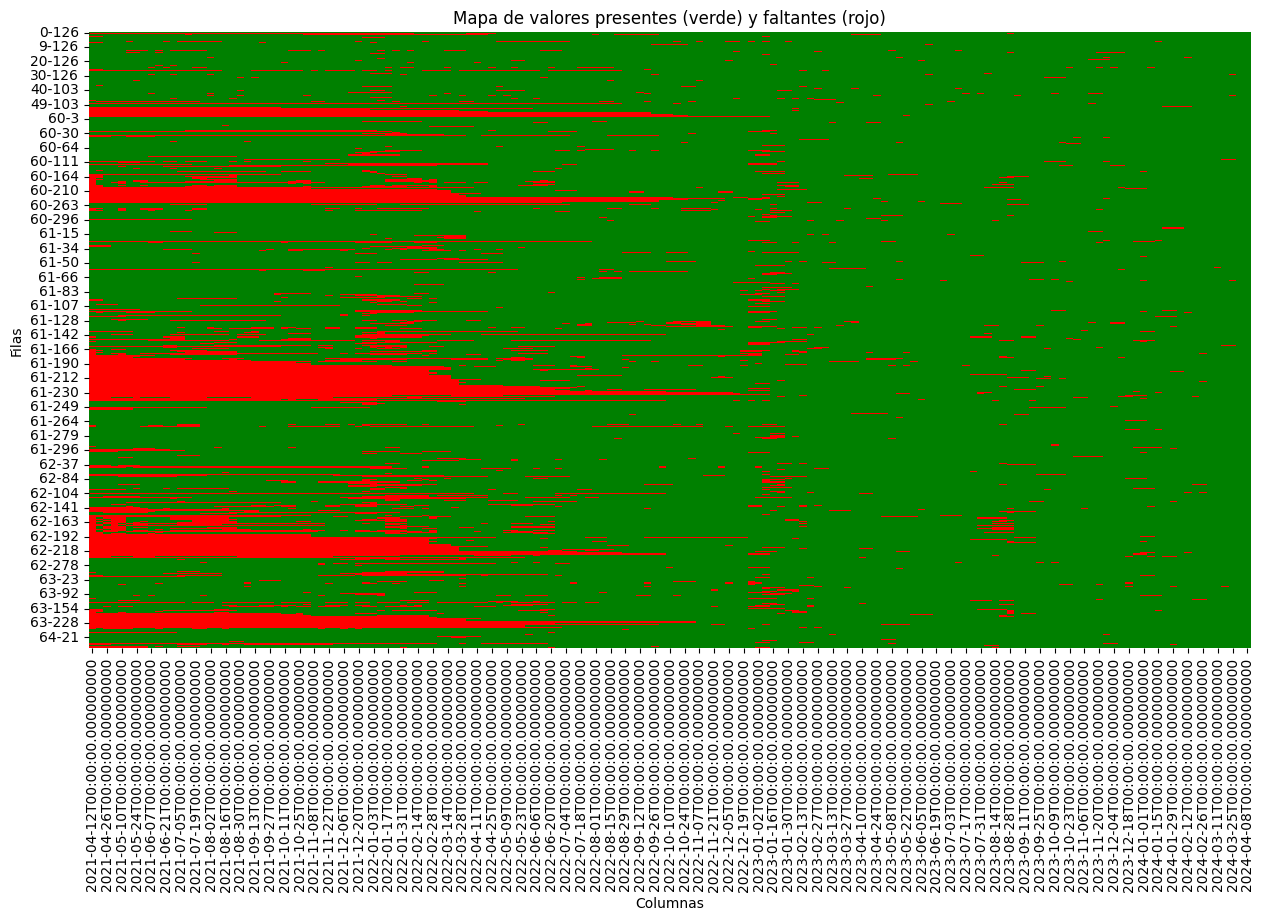

In [16]:
### graficar heatmap donde en verde indica que hubo venta y en rojo que es NULL (no hubo venta por no haber stock)

# Creamos una máscara booleana: True si hay valor, False si es NaN
mask = data_sales.notnull()

# Hacemos el heatmap: verde = valor presente, rojo = NaN
plt.figure(figsize=(15, 8))
sns.heatmap(mask, 
            cmap=sns.color_palette(["red", "green"]), 
            cbar=False)

plt.title("Mapa de valores presentes (verde) y faltantes (rojo)")
plt.xlabel("Columnas")
plt.ylabel("Filas")
plt.show()

### 3.b revisar la antepenultima semana que no hubo stock

In [17]:
# filtrar ante-penultima semana
date_to_filter = data_sales.columns[-3]
date_to_filter

Timestamp('2024-03-25 00:00:00')

In [18]:
# ver que efectivamente no hubo stock
data_sales[[date_to_filter]].isnull().sum()

2024-03-25    5
dtype: int64

In [19]:
# obtener las series que tuvieron valores NULL de venta en la ante-penultima semana
# no habia stock y por lo tanto no hubo venta
data_sales[data_sales[[date_to_filter]].isnull().any(axis=1)]

2021-04-12  2021-04-19  2021-04-26  2021-05-03  2021-05-10  \
Store Product                                                               
29    17              2.0         3.0         2.0         2.0         3.0   
43    17              6.0         4.0         2.0         1.0         4.0   
60    105             2.0         1.0         0.0         0.0         1.0   
61    69              2.0         1.0         0.0         1.0         0.0   
      155             0.0         1.0         6.0         0.0         1.0   

               2021-05-17  2021-05-24  2021-05-31  2021-06-07  2021-06-14  \
Store Product                                                               
29    17              2.0         1.0         2.0         NaN         3.0   
43    17              4.0         4.0         4.0         1.0         5.0   
60    105             0.0         2.0         0.0         0.0         0.0   
61    69              1.0         0.0         1.0         2.0         1.0   
      155             2.0         1.0         0.0         2.0         1.0   

               ...  2024-02-05  2024-02-12  2024-02-19  2024-02-26  \
Store Product  ...                                                   
29    17       ...        11.0         7.0        10.0        15.0   
43    17       ...         3.0         8.0         4.0         7.0   
60    105      ...         1.0         1.0         0.0         6.0   
61    69       ...         2.0         4.0         0.0         0.0   
      155      ...         0.0         5.0         0.0         0.0   

               2024-03-04  2024-03-11  2024-03-18  2024-03-25  2024-04-01  \
Store Product                                                               
29    17             15.0         9.0         5.0         NaN         3.0   
43    17              5.0         9.0         3.0         NaN         3.0   
60    105             1.0         2.0         NaN         NaN         2.0   
61    69              0.0         0.0         2.0         NaN         0.0   
      155             2.0         1.0         NaN         NaN         2.0   

               2024-04-08  
Store Product              
29    17             11.0  
43    17              3.0  
60    105             1.0  
61    69              0.0  
      155             1.0  

[5 rows x 157 columns]

### 4. Entender distribución de las ventas. Ej cuántas tiendas hay, cuantos productos hay, se comparten entre tiendas, cuando es la venta de cada producto, etc

In [20]:
# generar copy de data, tener "Store" y "Product" como columnas
data_sales_id = data_sales.copy()
data_sales_id = data_sales_id.reset_index()
data_sales_id.head(3)

,Store,Product,2021-04-12 00:00:00,2021-04-19 00:00:00,2021-04-26 00:00:00,2021-05-03 00:00:00,2021-05-10 00:00:00,2021-05-17 00:00:00,2021-05-24 00:00:00,2021-05-31 00:00:00,...,2024-02-05 00:00:00,2024-02-12 00:00:00,2024-02-19 00:00:00,2024-02-26 00:00:00,2024-03-04 00:00:00,2024-03-11 00:00:00,2024-03-18 00:00:00,2024-03-25 00:00:00,2024-04-01 00:00:00,2024-04-08 00:00:00
0,0,126,0.0,0.0,3.0,3.0,0.0,1.0,1.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1,0,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0
2,1,124,13.0,4.0,10.0,5.0,1.0,2.0,3.0,4.0,...,8.0,17.0,6.0,11.0,8.0,12.0,6.0,7.0,9.0,7.0


In [21]:
# tamaño data
data_sales_id.shape

(599, 159)

In [22]:
# cantidad única de "Product"
# ojo hay productos enumerados desde 0 hasta 296
unique_product = data_sales_id["Product"].drop_duplicates().sort_values()
unique_product = unique_product.reset_index(drop=True)
unique_product.shape

(297,)

In [23]:
# cantidad única de "Store"
# ojo hay tiendas enumeradas desde 0 hasta 66
unique_store = data_sales_id["Store"].drop_duplicates().sort_values()
unique_store = unique_store.reset_index(drop=True)
unique_store.shape

(67,)

In [24]:
# ver por producto, en cuántas store está
# -> hay productos que están en más de una tienda
unique_product_store = data_sales_id[["Product", "Store"]].drop_duplicates().sort_values(["Product"], ascending=True)
unique_product_store = unique_product_store.reset_index(drop=True)
unique_product_store

,Product,Store
0,0,61
1,1,62
2,2,62
3,2,61
4,2,60
...,...,...
594,294,62
595,295,61
596,296,62
597,296,61


In [25]:
# ver qué productos se repiten más
# ej producto 2, está en 4 tiendas
data_sales_id.groupby(["Product"])[["Store"]].nunique().reset_index()

,Product,Store
0,0,1
1,1,1
2,2,4
3,3,2
4,4,3
...,...,...
292,292,1
293,293,1
294,294,1
295,295,1


In [26]:
# -> se puede ver que el producto 126 se vende en 40 tiendas, luego el producto 124 se vende en 20 tiendas y así
data_sales_id.groupby(["Product"])[["Store"]].nunique().reset_index().sort_values("Store", ascending=False).head(10)

,Product,Store
126,126,40
124,124,20
17,17,18
103,103,14
23,23,5
239,239,4
100,100,4
214,214,4
268,268,4
49,49,4


In [27]:
# ver por STOCK, cualés venden más productos
# -> hay 3-5 tiendas que venden la mayoría de los productos, y luego otras tiendas más pequeñas que venden menos productos
data_sales_id.groupby(["Store"])[["Product"]].nunique().reset_index().sort_values("Product", ascending=False).head(10)

,Store,Product
61,61,224
62,62,123
60,60,100
63,63,54
64,64,12
9,9,3
0,0,2
41,41,2
28,28,2
32,32,2


In [28]:
# entender para cada combinación de "store", "product", distribución de las ventas,valor mínimo, máximo, etc
summary = (
    data_sales_id
    .groupby(["Product", "Store"])
    .apply(lambda x: pd.Series({
        "total_sales": x.iloc[:, 2:].sum().sum(),
        "min_weekly_sales": x.iloc[:, 2:].sum(axis=0).min(),
        "max_weekly_sales": x.iloc[:, 2:].sum(axis=0).max(),
        "mean_weekly_sales": x.iloc[:, 2:].sum(axis=0).mean()
    }))
    .reset_index()
)
summary

# -> se puede ver que el producto en algunas tiendas tiene más ventas que en otra tienda. lo que igual tiene sentido porque pueden ser tiendas más grandes

/var/folders/fx/0kx46vn52sg544t8x3s4hdl00000gn/T/ipykernel_54226/450897527.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


,Product,Store,total_sales,min_weekly_sales,max_weekly_sales,mean_weekly_sales
0,0,61,98.0,0.0,4.0,0.624204
1,1,62,111.0,0.0,8.0,0.707006
2,2,60,110.0,0.0,8.0,0.700637
3,2,61,308.0,0.0,24.0,1.961783
4,2,62,234.0,0.0,21.0,1.490446
...,...,...,...,...,...,...
594,294,62,103.0,0.0,6.0,0.656051
595,295,61,116.0,0.0,6.0,0.738854
596,296,60,181.0,0.0,11.0,1.152866
597,296,61,264.0,0.0,14.0,1.681529


In [29]:
# ordenar por los productos de más venta
summary.sort_values("total_sales", ascending=False)

,Product,Store,total_sales,min_weekly_sales,max_weekly_sales,mean_weekly_sales
275,124,61,15518.0,28.0,494.0,98.840764
65,23,61,13799.0,6.0,407.0,87.891720
278,125,60,13244.0,34.0,290.0,84.356688
64,23,60,8316.0,2.0,307.0,52.968153
47,17,64,7851.0,23.0,150.0,50.006369
...,...,...,...,...,...,...
473,218,63,63.0,0.0,4.0,0.401274
434,198,62,61.0,0.0,5.0,0.388535
111,49,9,59.0,0.0,3.0,0.375796
490,232,61,58.0,0.0,5.0,0.369427


### 5. Es posible calcular el costo? Objetivo de la competencia es forecasting y disminuir costos, en base a la historia entregada, es posible estimar costos de almacenaje (holding_cost) (no vender - sobre estimar) y costos por no tener stock (shortage_cost) (sub estimar)?

In [30]:
# params
holding_cost = 0.2 # per unit
shortage_cost = 1 # per unit

In [31]:
data_sales

2021-04-12  2021-04-19  2021-04-26  2021-05-03  2021-05-10  \
Store Product                                                               
0     126             0.0         0.0         3.0         3.0         0.0   
      182             NaN         NaN         NaN         NaN         NaN   
1     124            13.0         4.0        10.0         5.0         1.0   
2     124             5.0         5.0        12.0        16.0        10.0   
      126             NaN         NaN         6.0         5.0         7.0   
...                   ...         ...         ...         ...         ...   
64    193             NaN         NaN         NaN         NaN         NaN   
      238             NaN         NaN         NaN         0.0         1.0   
65    126             5.0         2.0         3.0         3.0         2.0   
66    124             NaN         NaN         NaN         NaN         NaN   
      126             NaN         NaN         NaN         NaN         NaN   

               2021-05-17  2021-05-24  2021-05-31  2021-06-07  2021-06-14  \
Store Product                                                               
0     126             1.0         1.0         0.0         1.0         0.0   
      182             NaN         NaN         NaN         NaN         NaN   
1     124             2.0         3.0         4.0         2.0         1.0   
2     124             8.0        10.0         9.0         7.0        10.0   
      126             4.0         1.0         2.0         6.0         5.0   
...                   ...         ...         ...         ...         ...   
64    193             NaN         NaN         NaN         NaN         NaN   
      238             0.0         1.0         0.0         0.0         1.0   
65    126             6.0         2.0         3.0         5.0         1.0   
66    124             NaN         NaN         NaN         2.0         NaN   
      126             NaN         NaN         NaN         1.0         3.0   

               ...  2024-02-05  2024-02-12  2024-02-19  2024-02-26  \
Store Product  ...                                                   
0     126      ...         0.0         2.0         2.0         0.0   
      182      ...         1.0         1.0         0.0         0.0   
1     124      ...         8.0        17.0         6.0        11.0   
2     124      ...         6.0         8.0         8.0        18.0   
      126      ...         2.0         0.0         2.0         5.0   
...            ...         ...         ...         ...         ...   
64    193      ...         1.0         0.0         0.0         0.0   
      238      ...         1.0         0.0         0.0         0.0   
65    126      ...         0.0         0.0         0.0        12.0   
66    124      ...         3.0         5.0         9.0        11.0   
      126      ...         2.0         0.0         6.0         9.0   

               2024-03-04  2024-03-11  2024-03-18  2024-03-25  2024-04-01  \
Store Product                                                               
0     126             0.0         0.0         0.0         0.0         2.0   
      182             1.0         1.0         0.0         3.0         1.0   
1     124             8.0        12.0         6.0         7.0         9.0   
2     124            11.0        14.0         3.0        12.0        13.0   
      126             2.0         2.0         4.0         2.0         3.0   
...                   ...         ...         ...         ...         ...   
64    193             2.0         0.0         1.0         1.0         2.0   
      238             0.0         1.0         2.0         1.0         1.0   
65    126             5.0         0.0         8.0         0.0        16.0   
66    124             8.0         5.0         4.0         7.0         6.0   
      126             0.0         0.0         0.0         8.0         2.0   

               2024-04-08  
Store Product              
0     126             2.0  
      182     

In [32]:
data_state

Start Inventory  Sales  Missed Sales  End Inventory  \
Store Product                                                        
0     126                    0      0             0              3   
      182                    0      0             0              1   
1     124                    0      0             0              6   
2     124                    0      0             0              9   
      126                    0      0             0              3   
...                        ...    ...           ...            ...   
64    193                    0      0             0              1   
      238                    0      0             0              2   
65    126                    0      0             0              3   
66    124                    0      0             0              8   
      126                    0      0             0              2   

               In Transit W+1  In Transit W+2  Holding Cost  Shortage Cost  \
Store Product                                                                
0     126                   0               3             0              0   
      182                   0               1             0              0   
1     124                   0               6             0              0   
2     124                   0               7             0              0   
      126                   0               1             0              0   
...                       ...             ...           ...            ...   
64    193                   0               0             0              0   
      238                   0               0             0              0   
65    126                   0               3             0              0   
66    124                   0               6             0              0   
      126                   0               2             0              0   

               Cumulative Holding Cost  Cumulative Shortage Cost  
Store Product                                                     
0     126                            0                         0  
      182                            0                         0  
1     124                            0                         0  
2     124                            0                         0  
      126                            0                         0  
...                                ...                       ...  
64    193                            0                         0  
      238                            0                         0  
65    126                            0                         0  
66    124                            0                         0  
      126                            0                         0  

[599 rows x 10 columns]

In [33]:
data_state["In Transit W+1"].sum()

np.int64(0)